In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import cross_val_score ,GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn .tree import DecisionTreeClassifier 
from sklearn .ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
import warnings as wg 
from sklearn.preprocessing import MinMaxScaler
wg.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\heart_failure_test (1).csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# check for missing values 
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
gender                      0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [4]:
# Describe the data 
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,gender,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'gender', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

EXPLORATORY DATA ANALYSIS

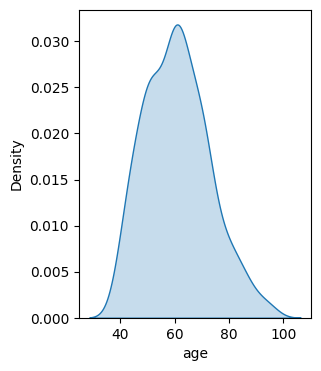

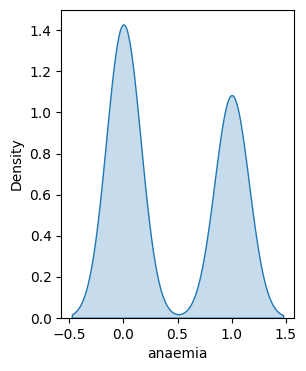

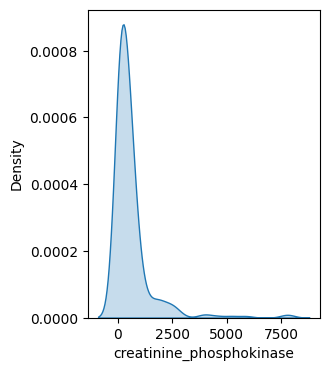

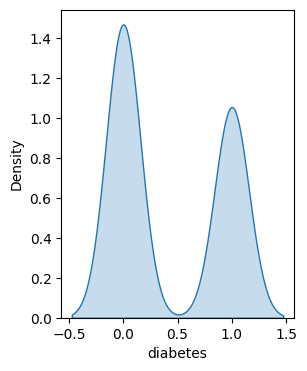

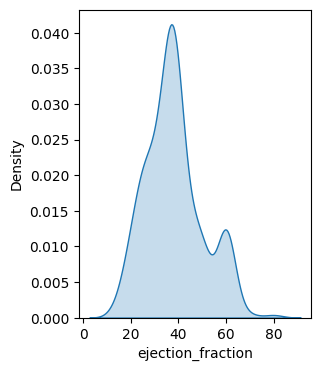

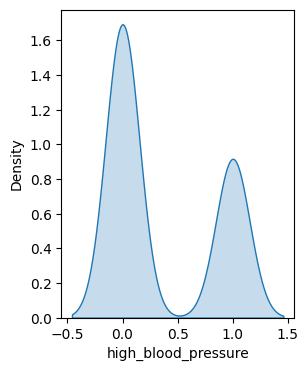

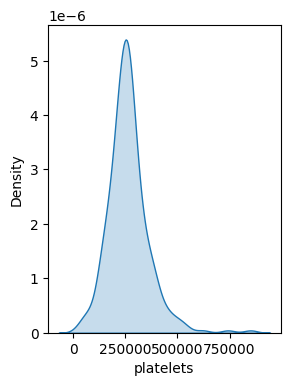

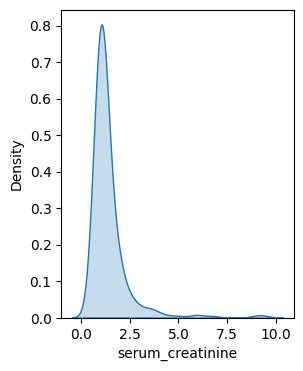

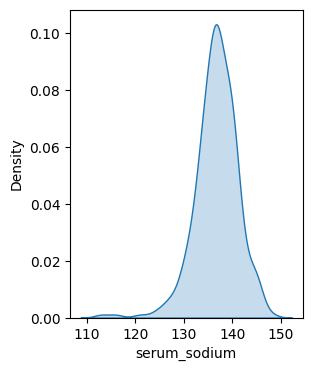

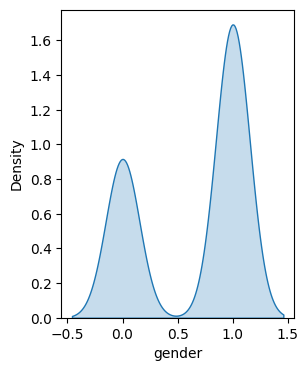

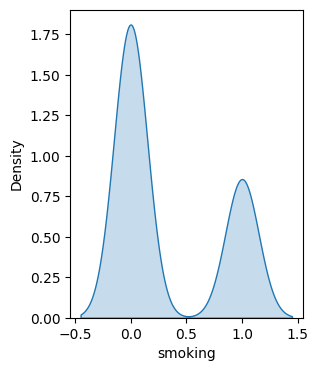

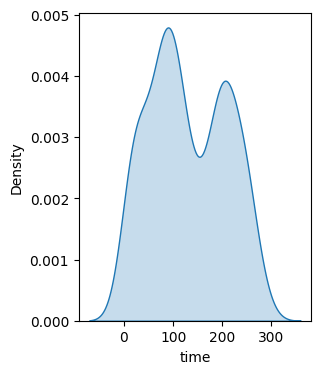

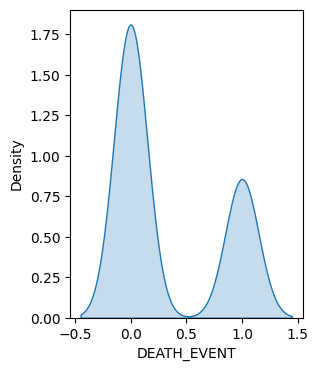

In [6]:
for i in df.columns:
    plt.figure(figsize=(3,4))
    sns.kdeplot(df[i],shade=True)

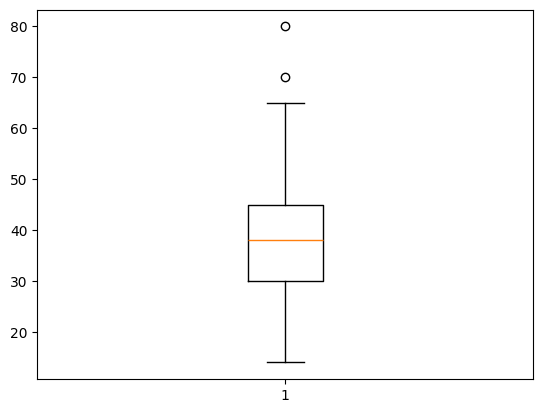

In [7]:
plt.boxplot(x=df.ejection_fraction)
plt.show()

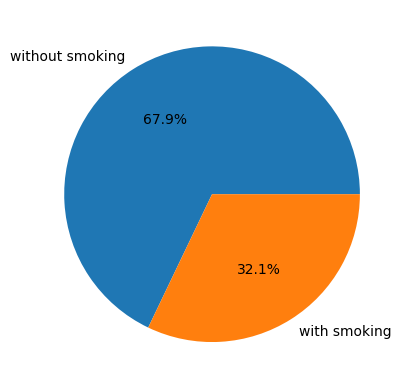

In [8]:
smoker_pie=df.smoking.value_counts()
smoker_label=['without smoking','with smoking']
plt.pie(smoker_pie,labels=smoker_label,autopct='%1.1f%%')
plt.show()

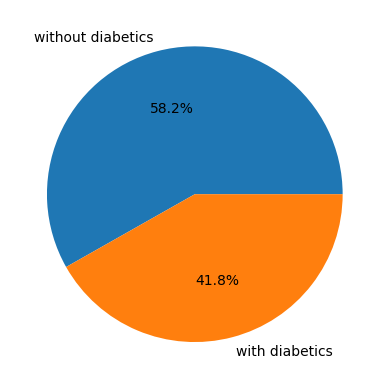

In [9]:
diabetic_pie=df.diabetes.value_counts()
diabetic_label=['without diabetics','with diabetics']
plt.pie(diabetic_pie,labels=diabetic_label,autopct='%1.1f%%')
plt.show()

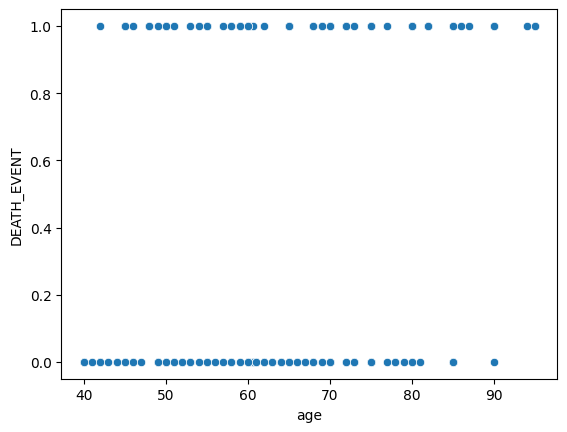

In [10]:
sns.scatterplot(x=df.age,y=df.DEATH_EVENT)
plt.show()   # shows that people with older age dead.

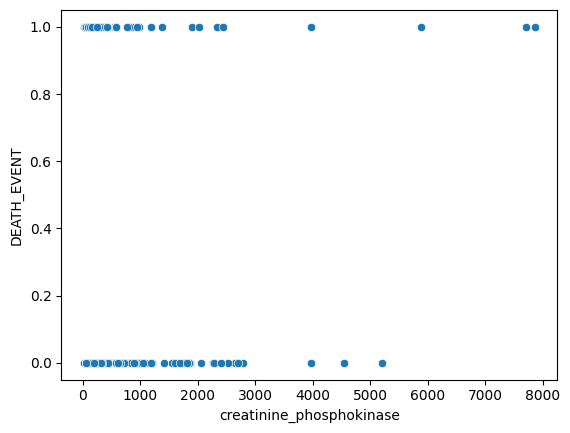

In [11]:
sns.scatterplot(x=df.creatinine_phosphokinase,y=df.DEATH_EVENT)
plt.show()  # higher amount creatinine_phosphokinase causes high amount of death

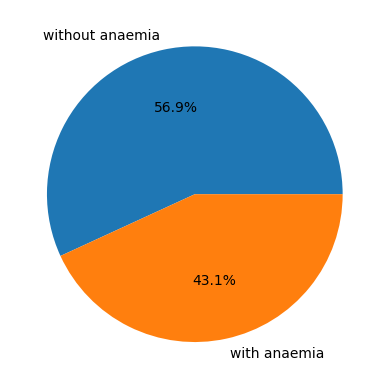

In [12]:
anaemia_pie=df.anaemia.value_counts()
anaemia_label=['without anaemia','with anaemia']
plt.pie(anaemia_pie,labels=anaemia_label,autopct='%1.1f%%')
plt.show()

SPLITING THE DATA INTO TRAINING AND TESTING 
(TRAIN 80% AND TEST 20%)

In [13]:
x=df.drop(columns=['DEATH_EVENT'],axis=0) 
y=df['DEATH_EVENT'] 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('the size of the training ,',x_train.shape)  
print('the size of the testing ,',x_test.shape)

the size of the training , (239, 12)
the size of the testing , (60, 12)


USING MINIMAXSCALAR TO SCALE THE   TRAINING SET

In [14]:
scalar=MinMaxScaler() 
train_x=scalar.fit_transform(x_train)
x_trains=pd.DataFrame(train_x,columns=x.columns) 


IMPORTANT FEARTURES USING VIF

In [15]:
vif=pd.DataFrame() 
vif['features']=x_trains.columns 
vif['vif']=[variance_inflation_factor(x_trains.values,i) for i in range(len(x_trains.columns))]  
vif  # the vif >5 is regarded unseful

,features,vif
0,age,4.112678
1,anaemia,1.882409
2,creatinine_phosphokinase,1.427080
3,diabetes,1.692489
4,ejection_fraction,5.237263
5,high_blood_pressure,1.656207
6,platelets,5.999188
7,serum_creatinine,1.764676
8,serum_sodium,15.140266
9,gender,3.437713


In [16]:
x_trains.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'gender', 'smoking', 'time'],
      dtype='object')

In [17]:
train_features=x_trains.drop(columns=['platelets','serum_sodium'])
train_features.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,gender,smoking,time
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,0.382909,0.435146,0.070692,0.405858,0.357902,0.351464,0.104396,0.644351,0.313808,0.456573
std,0.218164,0.496817,0.120814,0.492088,0.179249,0.478430,0.117056,0.479714,0.465013,0.278829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.218182,0.000000,0.011291,0.000000,0.230769,0.000000,0.047059,0.000000,0.000000,0.247331
50%,0.363636,0.000000,0.028324,0.000000,0.353846,0.000000,0.070588,1.000000,0.000000,0.409253
75%,0.536364,1.000000,0.071319,1.000000,0.461538,1.000000,0.105882,1.000000,1.000000,0.717082
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


MODEL BUILDING

In [18]:
log_model=LogisticRegression() 
log_model.fit(train_features,y_train)
log_pred=log_model.predict(train_features) 
log_acc=accuracy_score(y_train,log_pred)
print('logistic model accuracy',log_acc.mean())
print(classification_report(log_pred,y_train))

logistic model accuracy 0.8493723849372385
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       188
           1       0.61      0.84      0.70        51

    accuracy                           0.85       239
   macro avg       0.78      0.85      0.80       239
weighted avg       0.88      0.85      0.86       239



In [19]:
dec_model=DecisionTreeClassifier() 
dec_model.fit(train_features,y_train)
dec_pred=dec_model.predict(train_features) 
dec_acc=accuracy_score(y_train,dec_pred)
print('decision tree model accuracy',dec_acc.mean())
print(classification_report(dec_pred,y_train))

decision tree model accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00        71

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239



In [20]:
ran_model=RandomForestClassifier()
ran_model.fit(train_features,y_train)
ran_pred=ran_model.predict(train_features) 
ran_acc=accuracy_score(y_train,ran_pred)
print('random forest tree model accuracy',ran_acc.mean())
print(classification_report(ran_pred,y_train))

random forest tree model accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00        71

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239



In [21]:
knn_model=KNeighborsClassifier()
knn_model.fit(train_features,y_train)
knn_pred=knn_model.predict(train_features) 
knn_acc=accuracy_score(y_train,knn_pred)
print('knn model accuracy',knn_acc.mean())
print(classification_report(knn_pred,y_train))

knn model accuracy 0.7949790794979079
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       207
           1       0.38      0.84      0.52        32

    accuracy                           0.79       239
   macro avg       0.68      0.82      0.70       239
weighted avg       0.89      0.79      0.82       239



In [22]:
svm=SVC()
svm_model=svm.fit(train_features,y_train)
svm_pred=svm_model.predict(train_features) 
svm_acc=accuracy_score(y_train,svm_pred)
print('svm model accuracy',svm_acc.mean())
print(classification_report(svm_pred,y_train))

svm model accuracy 0.8744769874476988
              precision    recall  f1-score   support

           0       0.96      0.87      0.92       186
           1       0.66      0.89      0.76        53

    accuracy                           0.87       239
   macro avg       0.81      0.88      0.84       239
weighted avg       0.90      0.87      0.88       239



CHEACK IF MODEL OVERFITT

In [23]:
cv_log=cross_val_score(log_model,train_features,y_train,cv=5,scoring='accuracy')
print('cv of log',cv_log.mean())
cv_ran=cross_val_score(ran_model,train_features,y_train,cv=5,scoring='accuracy')
print('cv of random',cv_ran.mean())
cv_svc=cross_val_score(svm_model,train_features,y_train,cv=5,scoring='accuracy')
print('cv of svm',cv_svc.mean())
cv_knn=cross_val_score(knn_model,train_features,y_train,cv=5,scoring='accuracy')
print('cv of knn',cv_knn.mean())
cv_dec=cross_val_score(dec_model,train_features,y_train,cv=5,scoring='accuracy')
print('cv of decision tree',cv_dec.mean())


cv of log 0.8282801418439716
cv of random 0.8786347517730496
cv of svm 0.7573581560283686
cv of knn 0.7155141843971632
cv of decision tree 0.8117021276595745


BEST MODEL RANDOMFOREST (FINE TUNE THE BEST MODEL USING GRID SEARCH )

In [24]:
RandomForestClassifier()

RandomForestClassifier()

In [25]:
parameters={'n_estimators':[10,50,100,150,200],'max_depth':[3,9,15],'max_features':[2,4,5,12]}

In [26]:
GV=GridSearchCV(ran_model,param_grid=parameters,cv=5,scoring='accuracy',return_train_score=True).fit(train_features,y_train)

In [27]:
GV.best_estimator_

RandomForestClassifier(max_depth=9, max_features=2)

In [32]:
new_model=RandomForestClassifier(max_depth=9, max_features=2)
new_model.fit(train_features,y_train)
new_pred=new_model.predict(train_features) 
RAN_acc=accuracy_score(y_train,new_pred)
print('random forest tree model accuracy',RAN_acc.mean())
print(classification_report(new_pred,y_train))

random forest tree model accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00        71

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239



ON TEST DATA

In [29]:
x_test.columns
test_features=x_test.drop(columns=['platelets','serum_sodium'])

In [33]:
scalar=MinMaxScaler() 
test_x=scalar.fit_transform(test_features)
x_tests=pd.DataFrame(test_x,columns=test_features.columns) 
test_features.describe()
new_model.fit(test_features,y_test)
test_new_pred=new_model.predict(test_features) 
RAN_acc_test=accuracy_score(y_test,test_new_pred)
print('random forest tree model accuracy',RAN_acc_test.mean())
print(classification_report(test_new_pred,y_test))

random forest tree model accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        25

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [34]:
import joblib as jb 
jb.dump(new_model,"model.py")
jb.dump(scalar,"scalar.py")

['scalar.py']